# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection

**1. Загрузить датасет**

In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

df = pd.read_csv('creditcard_sampledata.csv')
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,64,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,...,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,34.70,0
1,1,64,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
2,2,124,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,...,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,6.24,0
3,3,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0
4,4,132,-1.571359,1.687508,0.734670,1.293350,-0.217532,-0.002677,0.147364,0.515362,...,0.048549,0.377256,-0.030436,0.117608,-0.060520,-0.296550,-0.481570,-0.167897,10.00,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 32 columns):
Unnamed: 0    8000 non-null int64
Time          8000 non-null int64
V1            8000 non-null float64
V2            8000 non-null float64
V3            8000 non-null float64
V4            8000 non-null float64
V5            8000 non-null float64
V6            8000 non-null float64
V7            8000 non-null float64
V8            8000 non-null float64
V9            8000 non-null float64
V10           8000 non-null float64
V11           8000 non-null float64
V12           8000 non-null float64
V13           8000 non-null float64
V14           8000 non-null float64
V15           8000 non-null float64
V16           8000 non-null float64
V17           8000 non-null float64
V18           8000 non-null float64
V19           8000 non-null float64
V20           8000 non-null float64
V21           8000 non-null float64
V22           8000 non-null float64
V23           8000 non-null float

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

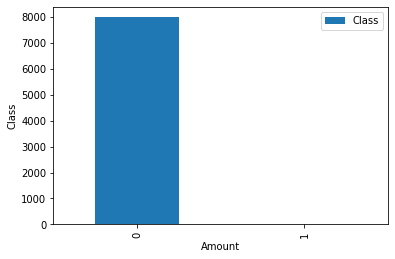

0    7983
1      17
Name: Class, dtype: int64

In [9]:
class_ = df['Class']
amount = df['Amount']

class_.value_counts().plot.bar()

plt.xlabel('Amount')
plt.ylabel('Class')
plt.legend()
plt.show()

class_.value_counts()

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [21]:
df.pivot_table(['Amount'], columns=class_, aggfunc=sum)

Class,0,1
Amount,716244.08,1109.89


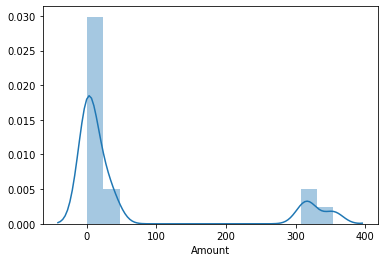

In [34]:
df_fraud = df[ df['Class']==1]
sns.distplot(df_fraud['Amount'])

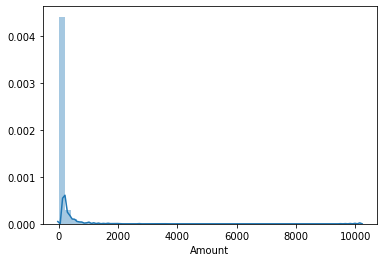

In [35]:
df_norm = df[ df['Class']==0]
sns.distplot(df_norm['Amount'])

**5. Построить графики histograms для всех значений**

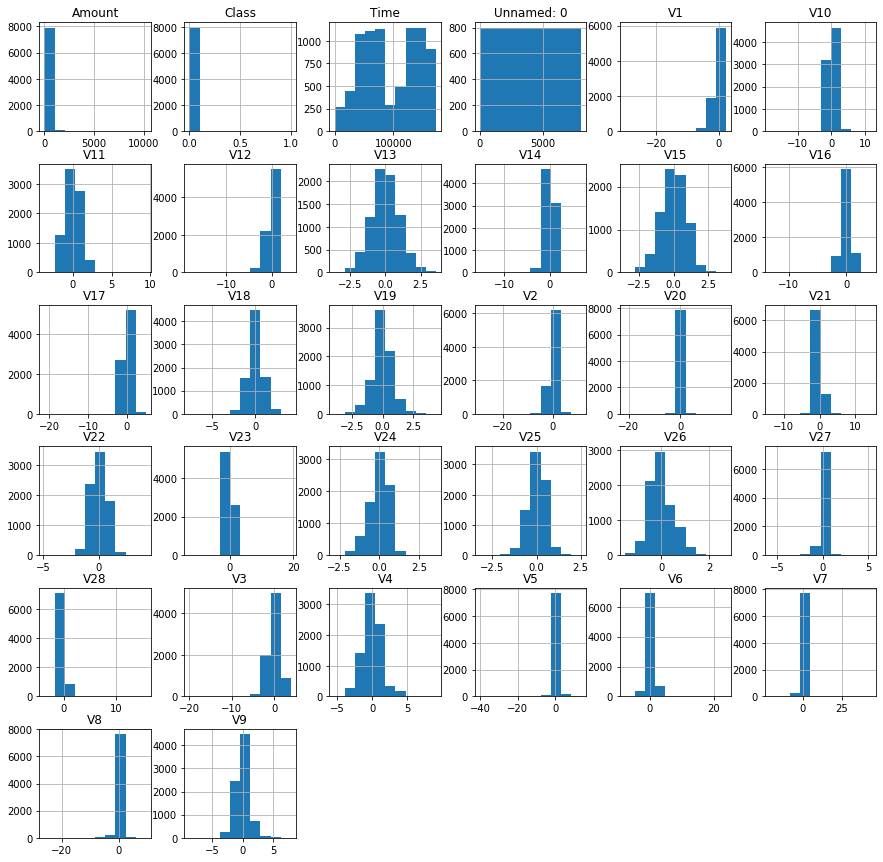

In [29]:
df.hist(figsize=(15,15))
plt.show()

**6. Построить матрицу корреляций для всех значений**

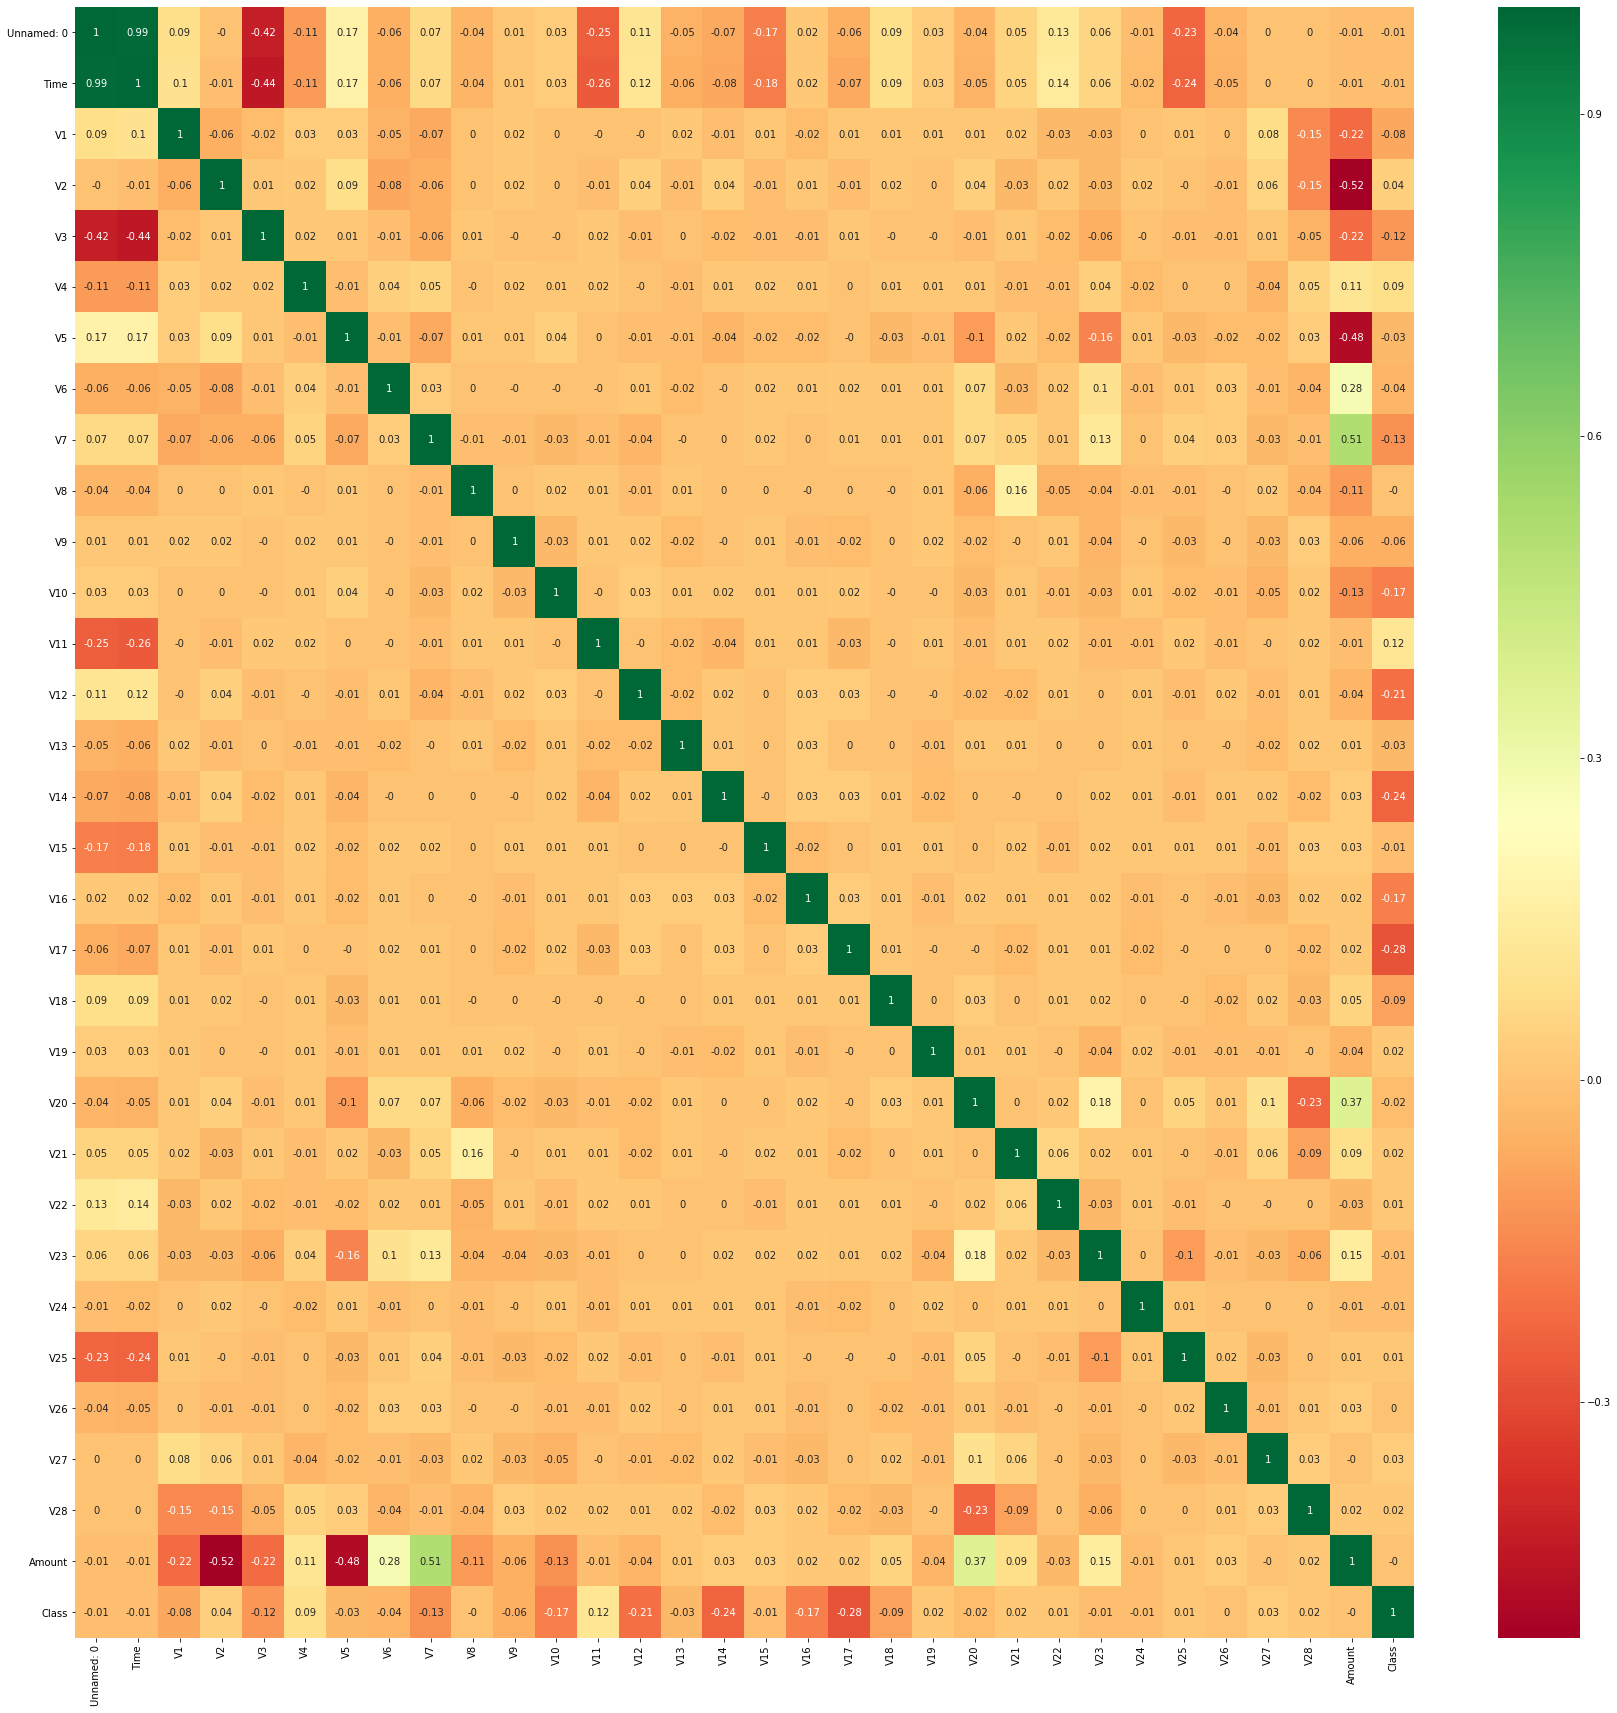

In [11]:
corr_matrix = df.corr(method ='pearson').round(2)
sns.heatmap(data=corr_matrix, yticklabels=True,xticklabels=True, annot=True, cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(30,30)
plt.show()

**7. Выбрать несколько элементов исходя из матрицы корреляций для предсказания таргет значения Class. Построить модель логистической регрессии. Разделить датасет на 80% тренировочных данных и 20% тестовых данных. Для fit метода использовать тренировочные данные, проверить качество модели на тестовых данных. Почему модель дает такой результат?**

Для разделения на тренировочный датасет и тестовый датасет можно использовать функцию  из sklearn:

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [12]:
train_X = df.drop('Class', axis=1).drop('Time', axis=1).drop('Unnamed: 0', axis=1)
train_Y = df['Class']
train_X.shape, train_Y.shape

((8000, 29), (8000,))

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_X,
                                                 train_Y,
                                                 test_size = 0.2,#%80 train, 20% test
                                                 random_state = 2)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model = LogisticRegression()
model.fit(X_train, y_train)
predicted_classes = model.predict(X_test)
accuracy = accuracy_score(y_test,predicted_classes)
print('Точность предсказания модели: ', accuracy)
parameters = model.coef_

Точность предсказания модели:  0.996875


/Users/mariadolgova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
# Логистическая регрессия показывает 99,7% точности, но если отдельно посмотреть на 
# precision и recall будет видно, что по 1-му классе, то есть, операциям fraud, 
# она не отследила ни одной операции - модель не работает

from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1597
           1       0.00      0.00      0.00         3

    accuracy                           1.00      1600
   macro avg       0.50      0.50      0.50      1600
weighted avg       1.00      1.00      1.00      1600



**8. Чтобы уравновесить датасет по классу Class, выберем одинаковое количество элементов из датасета по классу.** Необходимо посчитать минимальное количество (N) элементов, посчитанное в задаче 3. Выбрать N элементов рандомно из класса, имеющего бОльшее количество элементов, и все элементы из класса имеющего меньшее количество. Таким образом, мы уравновесим датасет по количеству элементов. Смоделировать линейную регрессию на полученном датасете. Посчитать качество модели. Получилось ли улучшить модель? Если да, то засчет чего?

In [32]:
print(class_.value_counts())

norm_17 = (df[df['Class']==0]).sample(17)

norm_17.head()

0    7983
1      17
Name: Class, dtype: int64


,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7900,7900,170032,1.995904,-0.041874,-0.695685,0.628852,-0.592811,-1.727317,0.196910,-0.384912,...,-0.231077,-0.546861,0.450573,0.927436,-0.422736,0.140866,-0.070793,-0.050868,3.59,0
332,332,22425,1.124506,-1.231201,0.942909,-0.310191,-1.509087,0.200595,-1.339021,0.192848,...,0.201747,0.573731,-0.176900,-0.354106,0.287414,-0.036836,0.002671,0.026478,121.90,0
869,869,37166,0.839617,-0.529642,2.164259,2.897294,-1.086013,2.230986,-1.515452,0.924590,...,0.182530,0.908325,-0.088295,-0.243339,0.246773,0.291050,0.109920,0.027463,42.43,0
5003,5003,123490,-3.746297,0.225285,1.623561,-0.642277,0.286801,0.352500,0.839318,-1.371153,...,-0.362121,0.556450,-0.121761,-0.300551,0.472316,-0.529835,-3.213323,-0.323723,5.99,0
5822,5822,136249,-1.135439,-0.104987,0.717117,-0.869072,-0.218537,0.736076,-0.030830,0.640078,...,-0.177313,-0.454034,-0.081305,-0.016010,0.597621,-0.044552,-0.071449,-0.043964,125.59,0


In [61]:
new_df = pd.concat([df_fraud,norm_17])

train_X1 = new_df.drop('Class', axis=1).drop('Time', axis=1).drop('Unnamed: 0', axis=1)
train_Y1 = new_df['Class']
train_X1.shape, train_Y1.shape

((34, 29), (34,))

In [63]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(train_X1,
                                                 train_Y1,
                                                 test_size = 0.2,#%80 train, 20% test
                                                 random_state = 2)

In [64]:
model1 = LogisticRegression()
model1.fit(X_train1, y_train1)
predicted_classes1 = model1.predict(X_test1)
accuracy1 = accuracy_score(y_test1,predicted_classes1)
print('Точность предсказания модели: ', accuracy1)
parameters1 = model1.coef_

Точность предсказания модели:  0.8571428571428571


/Users/mariadolgova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
print(classification_report(y_test1,predicted_classes1))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.75      0.86         4

    accuracy                           0.86         7
   macro avg       0.88      0.88      0.86         7
weighted avg       0.89      0.86      0.86         7



In [ ]:
# После уравнивания кол-ва элементов по классам, модель показала точность 85%
# Precision по первому классуц равен 1 и recall 0,75, что значительно улучшило предыдущую модель

**9. Написать модель RandomForestClassifier на данный датасет и сравнить результаты с логистической регрессией. Почему результаты получились лучше (или хуже). Тренировочные и тестовые данные выбираем одинаковые (те же, что и для логистической регрессии), полученные на шаге 7.**

In [70]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(n_estimators=100)
model_forest.fit(X_train, y_train)

model_forest.score(X_test, y_test)
# Результаты улучшились, потому что здесь был применен upsampling и модель случайного леса, которая точнее работает 
# с задачами классификации, где есть несбалансированные данные

0.998125